In [1]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['axes.grid'] = False

#import numpy as np
#import pandas as pd

#import sklearn

#import itertools

import logging
logger = logging.getLogger()

def show_image(filename, figsize=None, res_dir=True):
    if figsize:
        plt.figure(figsize=figsize)

    if res_dir:
        filename = './res/{}'.format(filename)

    plt.imshow(plt.imread(filename))


11 Dimensionality Reduction
========================

### 11.1 Eigenvalues and Eigenvectors of Symmetric Matrices

#### 11.1.1 Definitions
$M e = \lambda e$, where $\lambda$ is an *eigenvalue* and $e$ is the corresponding *eigenvector*.

to make the eigenvector unique, we require that:

1. every eigenvector is a *unit vector*.

2. the first nonzero component of an eigenvector is positive.

#### 11.1.2 Computing Eigenvalues and Eigenvectors
To find *principal* eigenvector, we use **power iteration** method:    
start with any unit vector $v$, and compute $M^i v$ iteratively until it converges. When $M$ is a stochastic matrix, the limiting vector is the *principal* eigenvector, and its corresponding eigenvalue is 1.

Another method $O(n^3)$: algebra solution.

#### 11.1.3 Finding Eigenpairs by Power Iteration
idea:     
Start by computing the pricipal eigenvector, then modify the matrix to, in effect, remove the principal eigenvector.

1. To find the pricipal eigenpair

    power iteration:     
    Start with any nonzero vector $x_0$ and then iterate:
    $$x_{k+1} := \frac{M x_k}{\| M x_k\|}$$

    $x$ is the pricipal eigenvector when it reaches convergence, and $\lambda_1 = x^T M x$.

    Attention: Since power iteration will introduce small errors, inaccuracies accumulate when we try to compute all eigenpairs.

2. To find the second eigenpair

    we create $M^* = M - \lambda_1 x x^T$, then use power iteration again.
    
    proof: the second eigenpair of $M^*$ is also that of $M$.     
    略

#### 11.1.4 The Matrix of Eigenvectors
the eigenvectors of a symmetric matrix are orthonormal

#### 11.1.5 Exercises for Section 11.1

### 11.2 Pricipal-Component Analysis
idea:     
treat the set of tuples as a matrix $M$ and find the eigenvectors for $M M^T$ or $M^T M$.

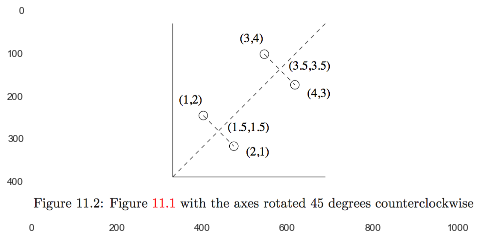

In [3]:
plt.imshow(plt.imread('./res/fig11_2.png'))

#### 11.2.2 Using Eigenvectors for Dimensionality Reduction
Since $M^T M e = \lambda e = e \lambda$,     
Let $E$ be the matrix whose columns are the eigenvectors, ordered as largest eigenvalue first. Define the matrix $L$ to have the eigenvalues of $M^T M$ along the diagonal, largest first, and 0's in all other entries.

$M^T M E = E L$

Let $E_k$ be the first $k$ columns of $E$. Then $M E_k$ is a $k$-dimensional representation of $M$.

#### 11.2.3 The Matrix of Distances
\begin{align}
    M^T M e &= \lambda e \\
    M M^T (M e) &= M \lambda e = \lambda (M e)
\end{align}

the eigenvalues of $M M^T$ are the eigenvalues of $M^T M$ plus additional 0's, and their eigenvectors are shared.

#### 11.2.4 Exercises for Section 11.2

### 11.3 Singular-Value Decomposition
#### 11.3.1 Definition of SVD
Let $M$ be an $m \times n$ matrix, and let the rank of $M$ be $r$.

$$M = U \Sigma V^T$$

+ $U$ is an $m \times r$ *column-orthnormal matrix* (each of its columns is a **unit vector** and the dot product of any two columns is 0).

+ $V$ is an $n \times r$ column-orthnormal maxtrix.

+ $\Sigma$ is a diagonal matrix. The elements of $\Sigma$ are called the *singular values* of $M$.

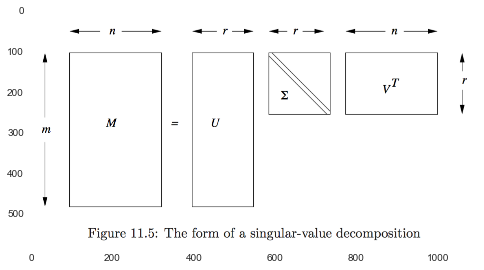

In [4]:
show_image('fig11_5.png')

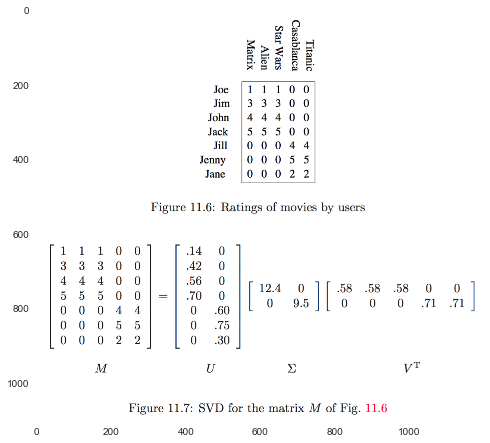

In [6]:
show_image('fig11_7.png', figsize=(8, 10))

#### 11.3.2 Interpretation of SVD
viewing the $r$ columns of $U$, $\Sigma$, and $V$ as representing *concepts* that are hidden in the original matrix $M$.

In Fig 11.7:

+ *concepts*: "science fiction" and "romance".

+ $U$ connects peopel to concepts.

+ $V$ connects movies to concepts.

+ $\Sigma$ give the strength of each of the concepts.

#### 11.3.3 Dimensionality Reduction Using SVD

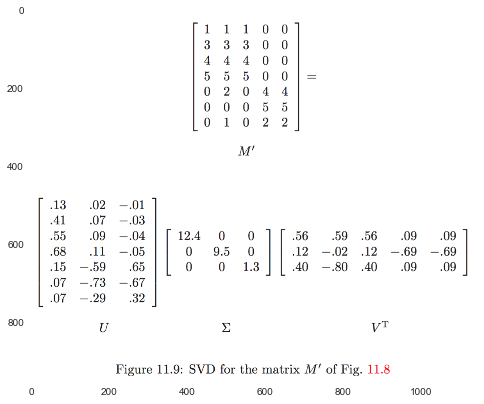

In [7]:
show_image('fig11_9.png', figsize=(8, 10))

If we set the $s$ smallest singular values to 0, then we can also eliminate the corresponding $s$ rows of $U$ and $V$.

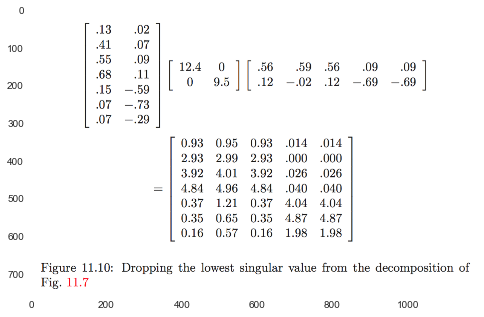

In [8]:
show_image('fig11_10.png', figsize=(8, 10))

#### 11.3.4 Why Zeroing Low Singular Values Works
Let $M = P Q R$, $m_{i j} = \sum_k \sum_l p_{ik} q_{kl} r_{lj}$.

Then
\begin{align}
    \| M \|^2 &= \sum_i \sum_j (m_{ij})^2 \\
              &= \sum_i \sum_j (\sum_k \sum_l p_{ik} q_{kl} r_{lj})^2 \\
              &= \sum_i \sum_j \left ( \sum_k \sum_l \sum_n \sum_m p_{ik} q_{kl} r_{lj} p_{in} q_{nm} r_{mj} \right) \\
              &\text{as $Q$ is diagonal matrix, $q_{kl}$ and $q_{nm}$ will be 0 unless $k = l$ and $n = m$.} \\
              &= \sum_i \sum_j \sum_k \sum_n p_{ik} q_{kk} r_{kj} p_{in} q_{nn} r_{nj} \\
              &= \sum_j \sum_k \sum_n \color{blue}{\sum_i p_{ik} p_{in}} q_{kk} r_{kj} q_{nn} r_{nj} \\
              &\text{as } P = U, \sum_i p_{ik} p_{in} = 1 \text{ if } k = n \text{ and 0 otherwise} \\
              &= \sum_j \sum_k q_{kk} r_{kj} q_{kk} r_{kj} \\
              &= \sum_k (q_{kk})^2
\end{align}

How many singular values should we retain?

A useful rule of thumb is to retain enough singular values to make up 90\% of the *energy* in $\Sigma$.

#### 11.3.5 Querying  Using Concepts
Let $q$ is the vector of user Quincy

+ what movies he would like?
  "concept space": $q V$, select the one whose score is highest.
  
+ find users similar to Quincy?
  measure the similarity of users by their cosine distance in concept space.

#### 11.3.6 Computing the SVD of a Matrix
The SVD of a matrix $M$ is strongly connected to the eigenvalues of the symmetric matrices $M^T M$and $M M^T$.

$M^T = (U \Sigma V^T)^T = V \Sigma^T U^T = V \Sigma U^T$

\begin{align}
    M^T M &= V \Sigma U^T U \Sigma V^T \\
          &= V \Sigma^2 V^T \\
    M^T M V &= V \Sigma^2 V^T V \\
            & = V \Sigma^2
\end{align}

similar, $M M^T U = U \Sigma^2$.

#### 11.3.7 Exercises for Section 11.3

### 11.4 CUR Decomposition
SVD: even if $M$ is sparse, $U$ and $V$ will be dense.

CUR: if $M$ is sparse, $C$ and $R$ will be sparse.


#### 11.4.2 Choosing Rows and Columns Properly

Let $f = \sum_{i,j} m_{ij}^2$.

1. find $C$
   + pick $r$ rows, and each row is picked with $p_i = \frac{\sum_j m_{ij}^2}{f}$.
   + normailize: each row is divided by $\sqrt{r p_i}$.
   
2. find $R$ 
   selected in the analogous way.
   
3. Counstructing $U$.
   + find $M$, that is the intersection of the chosen columns of $C$ and $R$.
   + compute the SVD of $W$: $W = X \Sigma Y^T$.
   + compute $\Sigma^+$, the *Moore-Penrose pseudoinverse* of the diagonal matrix $\Sigma$: replace $\sigma$ by $1/\sigma$ if $\sigma \neq 0$.
   + $U = Y (\Sigma^+)^2 X^T$.

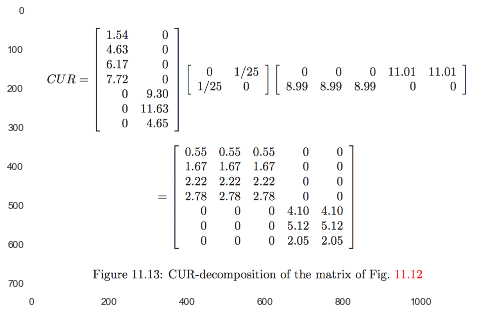

In [4]:
show_image('fig11_13.png')

##### Eliminating Duplicate Rows and Columns
it is possible that a single row or column is selected more than once, how to deal with it?

+ let it go.

+ or, merge same rows and/or columns
  $W$ will not be a sqaure matrix, then we need transpose the result to get $\Sigma^+$.

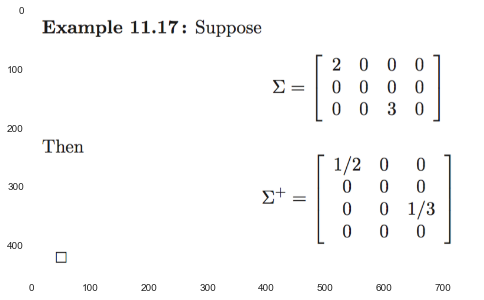

In [3]:
show_image('ex11_17.png')

In [5]:
#Exercise